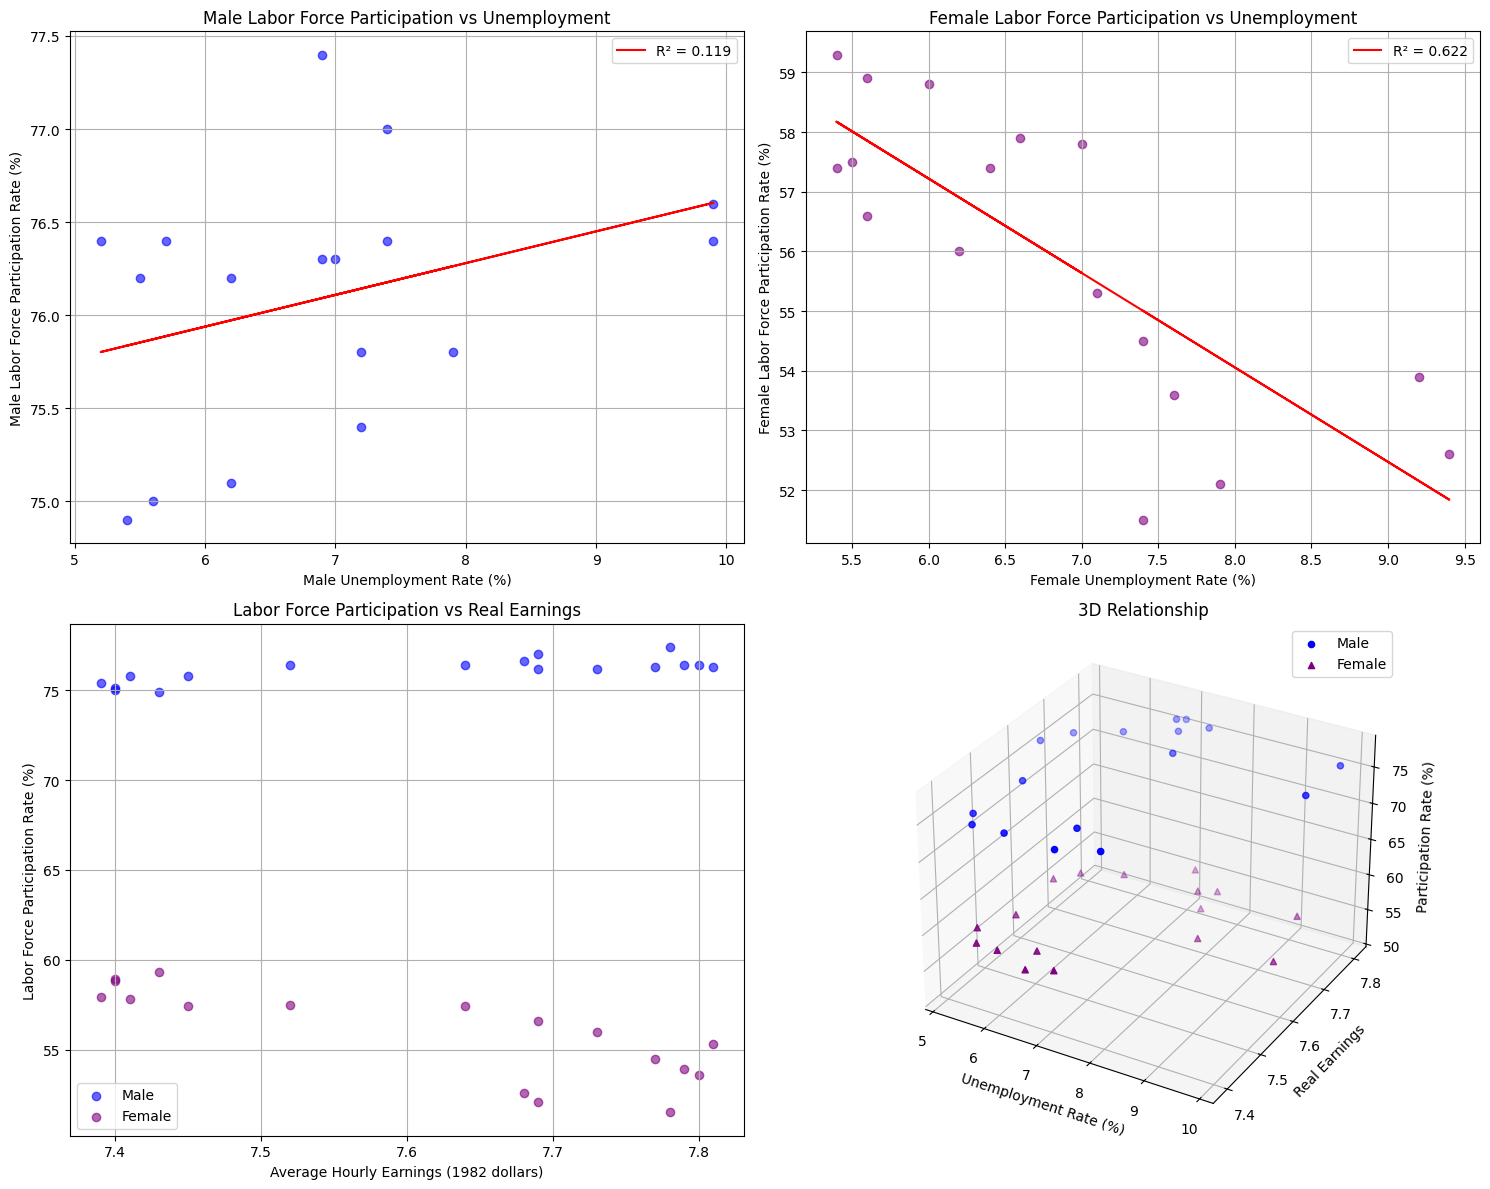


Correlation Analysis:

Male Statistics:
Correlation between Male Participation and Unemployment: 0.346
Correlation between Male Participation and Real Earnings: 0.788

Female Statistics:
Correlation between Female Participation and Unemployment: -0.789
Correlation between Female Participation and Real Earnings: -0.809

Trend Analysis:

Male Participation Rate Trend:
Slope: -0.1262 per year
P-value: 0.0000

Female Participation Rate Trend:
Slope: 0.4865 per year
P-value: 0.0000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


data = {
    'Year': range(1980, 1997),
    'CLFPRM': [77.4, 77.0, 76.6, 76.4, 76.4, 76.3, 76.3, 76.2, 76.2, 76.4, 76.4, 75.8, 75.8, 75.4, 75.1, 75.0, 74.9],
    'CLFPRF': [51.5, 52.1, 52.6, 53.9, 53.6, 54.5, 55.3, 56.0, 56.6, 57.4, 57.5, 57.4, 57.8, 57.9, 58.8, 58.9, 59.3],
    'UNRM': [6.9, 7.4, 9.9, 9.9, 7.4, 7.0, 6.9, 6.2, 5.5, 5.2, 5.7, 7.2, 7.9, 7.2, 6.2, 5.6, 5.4],
    'UNRF': [7.4, 7.9, 9.4, 9.2, 7.6, 7.4, 7.1, 6.2, 5.6, 5.4, 5.5, 6.4, 7.0, 6.6, 6.0, 5.6, 5.4],
    'AHE82': [7.78, 7.69, 7.68, 7.79, 7.80, 7.77, 7.81, 7.73, 7.69, 7.64, 7.52, 7.45, 7.41, 7.39, 7.40, 7.40, 7.43],
    'AHE': [6.66, 7.25, 7.68, 8.02, 8.32, 8.57, 8.76, 8.98, 9.28, 9.66, 10.01, 10.32, 10.57, 10.83, 11.12, 11.44, 11.82]
}

df = pd.DataFrame(data)


plt.style.use('default')
fig = plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(df['UNRM'], df['CLFPRM'], alpha=0.6, color='blue')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['UNRM'], df['CLFPRM'])
line = slope * df['UNRM'] + intercept
plt.plot(df['UNRM'], line, color='red', label=f'R² = {r_value**2:.3f}')
plt.xlabel('Male Unemployment Rate (%)')
plt.ylabel('Male Labor Force Participation Rate (%)')
plt.title('Male Labor Force Participation vs Unemployment')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 2)
plt.scatter(df['UNRF'], df['CLFPRF'], alpha=0.6, color='purple')
slope, intercept, r_value, p_value, std_err = stats.linregress(df['UNRF'], df['CLFPRF'])
line = slope * df['UNRF'] + intercept
plt.plot(df['UNRF'], line, color='red', label=f'R² = {r_value**2:.3f}')
plt.xlabel('Female Unemployment Rate (%)')
plt.ylabel('Female Labor Force Participation Rate (%)')
plt.title('Female Labor Force Participation vs Unemployment')
plt.grid(True)
plt.legend()


plt.subplot(2, 2, 3)
plt.scatter(df['AHE82'], df['CLFPRM'], label='Male', alpha=0.6, color='blue')
plt.scatter(df['AHE82'], df['CLFPRF'], label='Female', alpha=0.6, color='purple')
plt.xlabel('Average Hourly Earnings (1982 dollars)')
plt.ylabel('Labor Force Participation Rate (%)')
plt.title('Labor Force Participation vs Real Earnings')
plt.grid(True)
plt.legend()


ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(df['UNRM'], df['AHE82'], df['CLFPRM'], c='blue', marker='o', label='Male')
ax.scatter(df['UNRF'], df['AHE82'], df['CLFPRF'], c='purple', marker='^', label='Female')
ax.set_xlabel('Unemployment Rate (%)')
ax.set_ylabel('Real Earnings')
ax.set_zlabel('Participation Rate (%)')
ax.set_title('3D Relationship')
ax.legend()

plt.tight_layout()
plt.show()


print("\nCorrelation Analysis:")
print("\nMale Statistics:")
print(f"Correlation between Male Participation and Unemployment: {df['CLFPRM'].corr(df['UNRM']):.3f}")
print(f"Correlation between Male Participation and Real Earnings: {df['CLFPRM'].corr(df['AHE82']):.3f}")

print("\nFemale Statistics:")
print(f"Correlation between Female Participation and Unemployment: {df['CLFPRF'].corr(df['UNRF']):.3f}")
print(f"Correlation between Female Participation and Real Earnings: {df['CLFPRF'].corr(df['AHE82']):.3f}")


print("\nTrend Analysis:")
male_trend = stats.linregress(df['Year'], df['CLFPRM'])
female_trend = stats.linregress(df['Year'], df['CLFPRF'])

print(f"\nMale Participation Rate Trend:")
print(f"Slope: {male_trend.slope:.4f} per year")
print(f"P-value: {male_trend.pvalue:.4f}")

print(f"\nFemale Participation Rate Trend:")
print(f"Slope: {female_trend.slope:.4f} per year")
print(f"P-value: {female_trend.pvalue:.4f}")